# Analytics

#### Date: 2020/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: 2020/02
##### Professor: Hilmer Neri

##### Members:

- Arthur Matos
- Brian Pina
- Gabriel Sabanai
- Guilherme Marques
- Luiz Henrique Zamprogno
- Luiz Pettengill
- Matheus Blanco
- Pedro Féo
- Saleh Kader
- Victor Buendia


### LIBRARIES

In [1]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

from random import randint

### GRAPH SETTINGS

In [2]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

In [4]:
repos = [
    'Eccoar_Complaint',
    'eccoar_frontend',
    'Eccoar_Gateway',
    'Eccoar_Mailer',
    'Eccoar_Reports',
    'Eccoar_Users'
]

language = [['Eccoar_Complaint', 'ts'], 
            ['eccoar_frontend', 'ts'], 
            ['Eccoar_Gateway', 'ts'], 
            ['Eccoar_Mailer', 'ts'], 
            ['Eccoar_Reports', 'ts'], 
            ['Eccoar_Users', 'ts']]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

In [5]:
repos_language

{'Eccoar_Complaint': 'ts',
 'eccoar_frontend': 'ts',
 'Eccoar_Gateway': 'ts',
 'Eccoar_Mailer': 'ts',
 'Eccoar_Reports': 'ts',
 'Eccoar_Users': 'ts'}

##### Path to the folder with all your jsons

In [6]:
jsons = glob('**/*.json') # add the path here
jsons

['complaints/fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-03-05-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-05-05-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-10-05-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-12-04-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-17-04-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-17-05-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-21-04-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-23-03-2021-00:00.json',
 'complaints/fga-eps-mds-2020_2-Eccoar_Complaint-27-04-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-08-05-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-10-05-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-12-04-2021-00:00.json',
 '

In [7]:
issues = glob('issues.json')
sprints = glob('sprints.json')

In [8]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj


def create_base_component_df(json_list):

    df = pd.DataFrame()

    for i in json_list:
        base_component = read_json(i)
        base_component_data = base_component['baseComponent']['measures']
        base_component_df = pd.DataFrame(base_component_data)
        base_component_df['filename'] = os.path.basename(i)
        df = df.append(base_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)
    df['repository'] = aux_df[1]
    df['version'] = aux_df[2]
    df = df.sort_values(by=['repository', 'version'])
    return df

In [9]:
all_issues = read_json(issues[0])

In [10]:
all_sprints = read_json(sprints[0])

#### Create base component dataframe

In [11]:
base_component_df = create_base_component_df(jsons)

In [12]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
0,duplicated_lines_density,0.0,True,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
1,functions,42,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
2,test_execution_time,70,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
3,security_rating,1.0,True,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
4,tests,21,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
5,files,19,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
6,complexity,60,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
7,ncloc,626,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
8,coverage,68.2,False,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
9,reliability_rating,1.0,True,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00


#### Create dataframe per file

In [13]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [14]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'ts')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # replace TeamName by yours.    
    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

In [15]:
file_component_df = create_file_df(jsons)

In [16]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
0,src/migration/1618526567509-CreateComplaint.ts,2,2,0.0,0.0,0.0,76,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
1,src/migration/1618529825437-CreateVote.ts,2,2,0.0,0.0,0.0,38,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
2,src/utils/Category.ts,0,0,0.0,0.0,100.0,5,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
3,src/entity/Complaint.ts,0,0,0.0,0.0,100.0,36,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
4,src/repositories/ComplaintRepository.ts,7,7,0.0,0.0,61.3,80,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
5,src/utils/ComplaintUpvote.ts,1,3,0.0,0.0,63.6,16,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
6,src/utils/ComplaintVote.ts,0,0,0.0,0.0,NaN,9,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
7,src/utils/ComplaintVoteConfirmed.ts,1,3,0.0,0.0,92.3,18,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
8,src/utils/ComplaintWithVote.ts,0,0,0.0,0.0,NaN,18,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
9,src/controllers/ControllerComplaint.ts,13,24,0.0,0.0,90.3,170,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00


In [71]:
file_component_df['version'] = pd.to_datetime(file_component_df['version'], format="%d-%m-%Y-%H:%M")

In [72]:
file_component_df.to_excel('data/data.xlsx', index = False)

In [73]:
file_component_df.repository.unique()

array(['Eccoar_Complaint', 'Eccoar_Gateway', 'Eccoar_Mailer',
       'Eccoar_Reports', 'Eccoar_Users', 'eccoar_frontend'], dtype=object)

#### Create dataframe per repository

In [74]:
repository_dataframes = {} 

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df
    
repository_dataframes.keys()

dict_keys(['Eccoar_Complaint', 'eccoar_frontend', 'Eccoar_Gateway', 'Eccoar_Mailer', 'Eccoar_Reports', 'Eccoar_Users'])

In [75]:
eccoar_complaint_df = file_component_df[file_component_df['repository'] == 'Eccoar_Complaint']
eccoar_gateway_df = file_component_df[file_component_df['repository'] == 'Eccoar_Gateway']
eccoar_frontend_df = file_component_df[file_component_df['repository'] == 'eccoar_frontend']
eccoar_reports_df = file_component_df[file_component_df['repository'] == 'Eccoar_Reports']
eccoar_mailer_df = file_component_df[file_component_df['repository'] == 'Eccoar_Mailer']
eccoar_users_df = file_component_df[file_component_df['repository'] == 'Eccoar_Users']
...

Ellipsis

In [76]:
repository_dataframes["Eccoar_Complaint"].head()

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
0,src/migration/1618526567509-CreateComplaint.ts,2,2,0.0,0.0,0.0,76,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,2021-05-01
1,src/migration/1618529825437-CreateVote.ts,2,2,0.0,0.0,0.0,38,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,2021-05-01
2,src/utils/Category.ts,0,0,0.0,0.0,100.0,5,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,2021-05-01
3,src/entity/Complaint.ts,0,0,0.0,0.0,100.0,36,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,2021-05-01
4,src/repositories/ComplaintRepository.ts,7,7,0.0,0.0,61.3,80,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,2021-05-01


### Metric calculations

##### COMPLEXITY

In [77]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [78]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [79]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

### NCLOC

In [80]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        ncloc += int(each)
    
    return ncloc

##### PRODUCTIVITY

#### RESOLVED ISSUES' THROUGHPUT

In [81]:
def m7(number_of_issues_resolved, number_of_issues):
    
    resolved_issues_throughput = round((number_of_issues_resolved / number_of_issues) * 100, 2)
    
    return resolved_issues_throughput

#### ISSUE TYPE IN A TIMEFRAME

In [82]:
def density(issue, number_of_issues):
    issue_density = round((issue / number_of_issues) * 100, 2)
    return issue_density

In [83]:
def m8(tag_dict, number_of_issues):
    
    issue_densities = {
        "hotfix": [density(tag_dict["HOTFIX"], number_of_issues)],
        "docs": [density(tag_dict["DOCS"], number_of_issues)],
        "feature": [density(tag_dict["FEATURE"], number_of_issues)],
        "arq": [density(tag_dict["ARQ"], number_of_issues)],
        "devops": [density(tag_dict["DEVOPS"], number_of_issues)],
        "analytics": [density(tag_dict["ANALYTICS"], number_of_issues)],
        "us": [density(tag_dict["US"], number_of_issues)],
        "easy": [density(tag_dict["EASY"], number_of_issues)],
        "medium": [density(tag_dict["MEDIUM"], number_of_issues)],
        "hard": [density(tag_dict["HARD"], number_of_issues)],
        "eps": [density(tag_dict["EPS"], number_of_issues)],
        "mds": [density(tag_dict["MDS"], number_of_issues)]
    }
    
    soma = 0
    
    for i in issue_densities:
        soma += issue_densities[i][0]
    
    issue_density = soma/12.0
    
    return issue_density
    

#### BUGS RATIO

In [84]:
def m9(tag_dict, number_of_issues):
    
    bugs_ratio = round(((tag_dict["DOCS"] + tag_dict["FEATURE"] + tag_dict["ARQ"] + tag_dict["DEVOPS"] + tag_dict["ANALYTICS"]) / number_of_issues) * 100, 2)
    
    return bugs_ratio

In [85]:
TAGS = {
    'HOTFIX': 15,
    'DOCS': 121,
    'FEATURE': 32,
    'ARQ': 15,
    'DEVOPS': 12,
    'ANALYTICS': 23,
    'US': 19,
    'EASY': 28,
    'MEDIUM': 22,
    'HARD': 7,
    'EPS': 61,
    'MDS': 41
}
NUMBER_OF_ISSUES_RESOLVED=201
NUMBER_OF_ISSUES=236

In [87]:
df = pd.read_csv('result.csv')

In [88]:
m7(NUMBER_OF_ISSUES_RESOLVED, NUMBER_OF_ISSUES)

85.17

In [89]:
m8(TAGS, NUMBER_OF_ISSUES)

13.983333333333333

In [90]:
m9(TAGS, NUMBER_OF_ISSUES)

86.02

### Calculate m1, m2, m3, m7, m8, m9 for each repository

In [91]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []
    ncloc_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        ncloc_list.append(_ncloc(version_df))
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list
                              })
    
    metrics_df.to_csv('result.csv')
        
    return metrics_df

In [92]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():   
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df

In [93]:
def create_df(base_issue_data):
    base_issue_m7 = []
    base_issue_m9 = []
    sprint_list = []
    start_list = []
    end_list = []
    
    for issue in base_issue_data:
        base_issue_m7.append(m7(base_issue_data[issue]['CLOSED_ISSUES'], NUMBER_OF_ISSUES))
        base_issue_m9.append(m9(base_issue_data[issue]['TAGS'], NUMBER_OF_ISSUES))
        sprint_list.append(int(issue.split(" ")[1]))
        start_list.append(all_sprints[issue]['start'])
        end_list.append(all_sprints[issue]['end'])
    df = pd.DataFrame({
                       'm7': base_issue_m7, 
                       'm9': base_issue_m9, 
                       'sprints': sprint_list,
                       'start_sprint': start_list,
                       'end_sprint': end_list
                    })
    metrics_df.to_csv('fga-eps-mds-2020-2-Eccoar-qualidade-total-processo.csv')
    
    return df

In [94]:
issue_df = create_df(all_issues)
issue_df['start_sprint'] = pd.to_datetime(issue_df['start_sprint'], format='%d/%m/%Y')
issue_df['end_sprint'] = pd.to_datetime(issue_df['end_sprint'], format='%d/%m/%Y')
issue_df

,m7,m9,sprints,start_sprint,end_sprint
0,0.85,0.42,0,2021-02-02,2021-02-08
1,7.63,5.08,1,2021-02-09,2021-02-15
2,5.51,3.81,2,2021-02-16,2021-02-22
3,7.20,6.78,3,2021-02-23,2021-03-01
4,7.20,7.63,4,2021-03-02,2021-03-08
5,8.05,5.51,5,2021-03-09,2021-03-15
6,6.36,6.36,6,2021-03-16,2021-03-22
7,4.66,3.39,7,2021-03-23,2021-03-29
8,3.81,2.97,8,2021-03-30,2021-04-05
9,7.63,6.36,9,2021-04-06,2021-04-12


In [95]:
eccoar_gateway_metrics = create_metrics_df(eccoar_gateway_df)
eccoar_complaint_metrics = create_metrics_df(eccoar_complaint_df)
eccoar_frontend_metrics = create_metrics_df(eccoar_frontend_df)
eccoar_mailer_metrics = create_metrics_df(eccoar_mailer_df)
eccoar_reports_metrics = create_metrics_df(eccoar_reports_df)
eccoar_users_metrics = create_metrics_df(eccoar_users_df)
file_component_metrics = create_metrics_df(file_component_df)

In [96]:
eccoar_gateway_metrics

,m1,m2,m3,repository,version,ncloc
0,0.875000,0.0,1.0,Eccoar_Gateway,2021-05-01,305
1,0.875000,0.0,1.0,Eccoar_Gateway,2021-05-03,305
2,0.875000,0.0,1.0,Eccoar_Gateway,2021-05-05,321
3,0.875000,0.0,1.0,Eccoar_Gateway,2021-05-10,338
4,1.000000,0.0,1.0,Eccoar_Gateway,2021-04-12,256
5,1.000000,0.0,1.0,Eccoar_Gateway,2021-04-17,256
6,0.909091,0.0,1.0,Eccoar_Gateway,2021-05-17,494
7,1.000000,0.0,1.0,Eccoar_Gateway,2021-03-23,110
8,1.000000,0.0,1.0,Eccoar_Gateway,2021-04-23,267
9,0.875000,0.0,1.0,Eccoar_Gateway,2021-04-28,305


In [159]:
def add_m7_and_m9(metrics_df):

    m7_list = []

    for _, release in metrics_df.iterrows():

        curr_version = release['version']

        for _, row in issue_df.iterrows():
            if pd.Timestamp.to_numpy(row['start_sprint']) <= curr_version <= pd.Timestamp.to_numpy(row['end_sprint']):
                m7_list.append(row['m7'])
            else:
                release['m7'] = None

    m7_list = pd.DataFrame(m7_list, columns=['m7'])

    metrics_df = pd.concat([metrics_df, m7_list])

    return metrics_df

In [160]:
add_m7_and_m9(eccoar_gateway_metrics)

,0,m1,m2,m3,m7,ncloc,repository,version
0,NaN,0.875000,0.0,1.0,None,305.0,Eccoar_Gateway,2021-05-01
1,NaN,0.875000,0.0,1.0,None,305.0,Eccoar_Gateway,2021-05-03
2,NaN,0.875000,0.0,1.0,None,321.0,Eccoar_Gateway,2021-05-05
3,NaN,0.875000,0.0,1.0,None,338.0,Eccoar_Gateway,2021-05-10
4,NaN,1.000000,0.0,1.0,None,256.0,Eccoar_Gateway,2021-04-12
5,NaN,1.000000,0.0,1.0,None,256.0,Eccoar_Gateway,2021-04-17
6,NaN,0.909091,0.0,1.0,None,494.0,Eccoar_Gateway,2021-05-17
7,NaN,1.000000,0.0,1.0,None,110.0,Eccoar_Gateway,2021-03-23
8,NaN,1.000000,0.0,1.0,None,267.0,Eccoar_Gateway,2021-04-23
9,NaN,0.875000,0.0,1.0,None,305.0,Eccoar_Gateway,2021-04-28


In [54]:
def calculate_ac(df):
    df['asc1'] = (df['m1'] + df['m2'] + df['m3']) / 3
    df['ac1'] = df['asc1']
    df['totalAC1'] = df['asc1']
    return df
print(df)

    Unnamed: 0        m1        m2   m3        repository           version  \
0            0  0.666667  0.000000  1.0  Eccoar_Complaint  01-05-2021-00:00   
1            1  0.750000  0.011364  1.0  Eccoar_Complaint  03-05-2021-00:00   
2            2  0.750000  0.000000  1.0  Eccoar_Complaint  05-05-2021-00:00   
3            3  0.811594  0.014493  1.0  Eccoar_Complaint  10-05-2021-00:00   
4            4  0.791667  0.013889  1.0  Eccoar_Complaint  12-04-2021-00:00   
5            5  0.765625  0.015625  1.0  Eccoar_Complaint  17-04-2021-00:00   
6            6  0.778947  0.010526  1.0  Eccoar_Complaint  17-05-2021-00:00   
7            7  0.756098  0.024390  1.0  Eccoar_Complaint  21-04-2021-00:00   
8            8  0.846154  0.019231  1.0  Eccoar_Complaint  23-03-2021-00:00   
9            9  0.742857  0.014286  1.0  Eccoar_Complaint  27-04-2021-00:00   
10          10  0.826923  0.019231  1.0    Eccoar_Gateway  23-04-2021-00:00   
11          11  0.875000  0.000000  1.0    Eccoar_Ga

In [63]:
def calculate_ac2(issue_df):
    aux_df = pd.DataFrame({
        "asc2": [],
        "totalAC2": []
    })
    aux_df['asc2'] = (issue_df['m7'] + issue_df['m9']) / 2
    aux_df['totalAC2'] = aux_df['asc2']
    return pd.concat([issue_df, aux_df], 1)

issue_df_v2 = calculate_ac2(issue_df)
issue_df_v2

,m7,m9,sprints,start_sprint,end_sprint,asc2,totalAC2
0,0.85,0.42,0,02/02/2021,08/02/2021,0.635,0.635
1,7.63,5.08,1,09/02/2021,15/02/2021,6.355,6.355
2,5.51,3.81,2,16/02/2021,22/02/2021,4.660,4.660
3,7.20,6.78,3,23/02/2021,01/03/2021,6.990,6.990
4,7.20,7.63,4,02/03/2021,08/03/2021,7.415,7.415
5,8.05,5.51,5,09/03/2021,15/03/2021,6.780,6.780
6,6.36,6.36,6,16/03/2021,22/03/2021,6.360,6.360
7,4.66,3.39,7,23/03/2021,29/03/2021,4.025,4.025
8,3.81,2.97,8,30/03/2021,05/04/2021,3.390,3.390
9,7.63,6.36,9,06/04/2021,12/04/2021,6.995,6.995


In [42]:
eccoar_gateway_metrics = calculate_ac(eccoar_gateway_metrics)
eccoar_complaint_metrics = calculate_ac(eccoar_complaint_metrics)
eccoar_frontend_metrics = calculate_ac(eccoar_frontend_metrics)
eccoar_mailer_metrics = calculate_ac(eccoar_mailer_metrics)
eccoar_reports_metrics = calculate_ac(eccoar_reports_metrics)
eccoar_users_metrics = calculate_ac(eccoar_users_metrics)
file_component_metrics = calculate_ac(file_component_metrics)

In [43]:
def plot_linear_regression(df):
    sns.regplot(x=df["totalAC1"], y=df["totalAC2"], line_kws={"color":"r","alpha":0.7,"lw":5})
    plt.show()

In [44]:
plot_linear_regression(eccoar_frontend_metrics)

KeyError: 'totalAC2'

In [ ]:
plot_linear_regression(eccoar_complaint_metrics)

In [ ]:
plot_linear_regression(eccoar_gateway_metrics)

In [ ]:
plot_linear_regression(eccoar_complaint_metrics)

In [ ]:
plot_linear_regression(eccoar_mailer_metrics)

In [ ]:
plot_linear_regression(eccoar_users_metrics)

In [45]:
plot_linear_regression(eccoar_reports_metrics)

KeyError: 'totalAC2'

# Descriptive Statistic Analysis

- Realizes the calculation of statistic data such as mean, median, mode, min, max, standard deviation and variance.

In [ ]:
def descriptive_statistics(df):
    
    metrics = df.describe()
    variance = df.var()
    variance_df = pd.DataFrame(variance, columns=["var"])
    variance_df = variance_df.T
    return metrics.append(variance_df).T

In [46]:
descriptive_statistics(eccoar_complaint_metrics)

NameError: name 'descriptive_statistics' is not defined

In [ ]:
descriptive_statistics(eccoar_gateway_metrics)

In [ ]:
descriptive_statistics(eccoar_frontend_metrics)

In [ ]:
descriptive_statistics(eccoar_reports_metrics)

In [ ]:
descriptive_statistics(eccoar_users_metrics)

In [ ]:
descriptive_statistics(eccoar_mailer_metrics)

In [ ]:
descriptive_statistics(file_component_metrics)

### Data visualization

- You must do this for each of your repositories

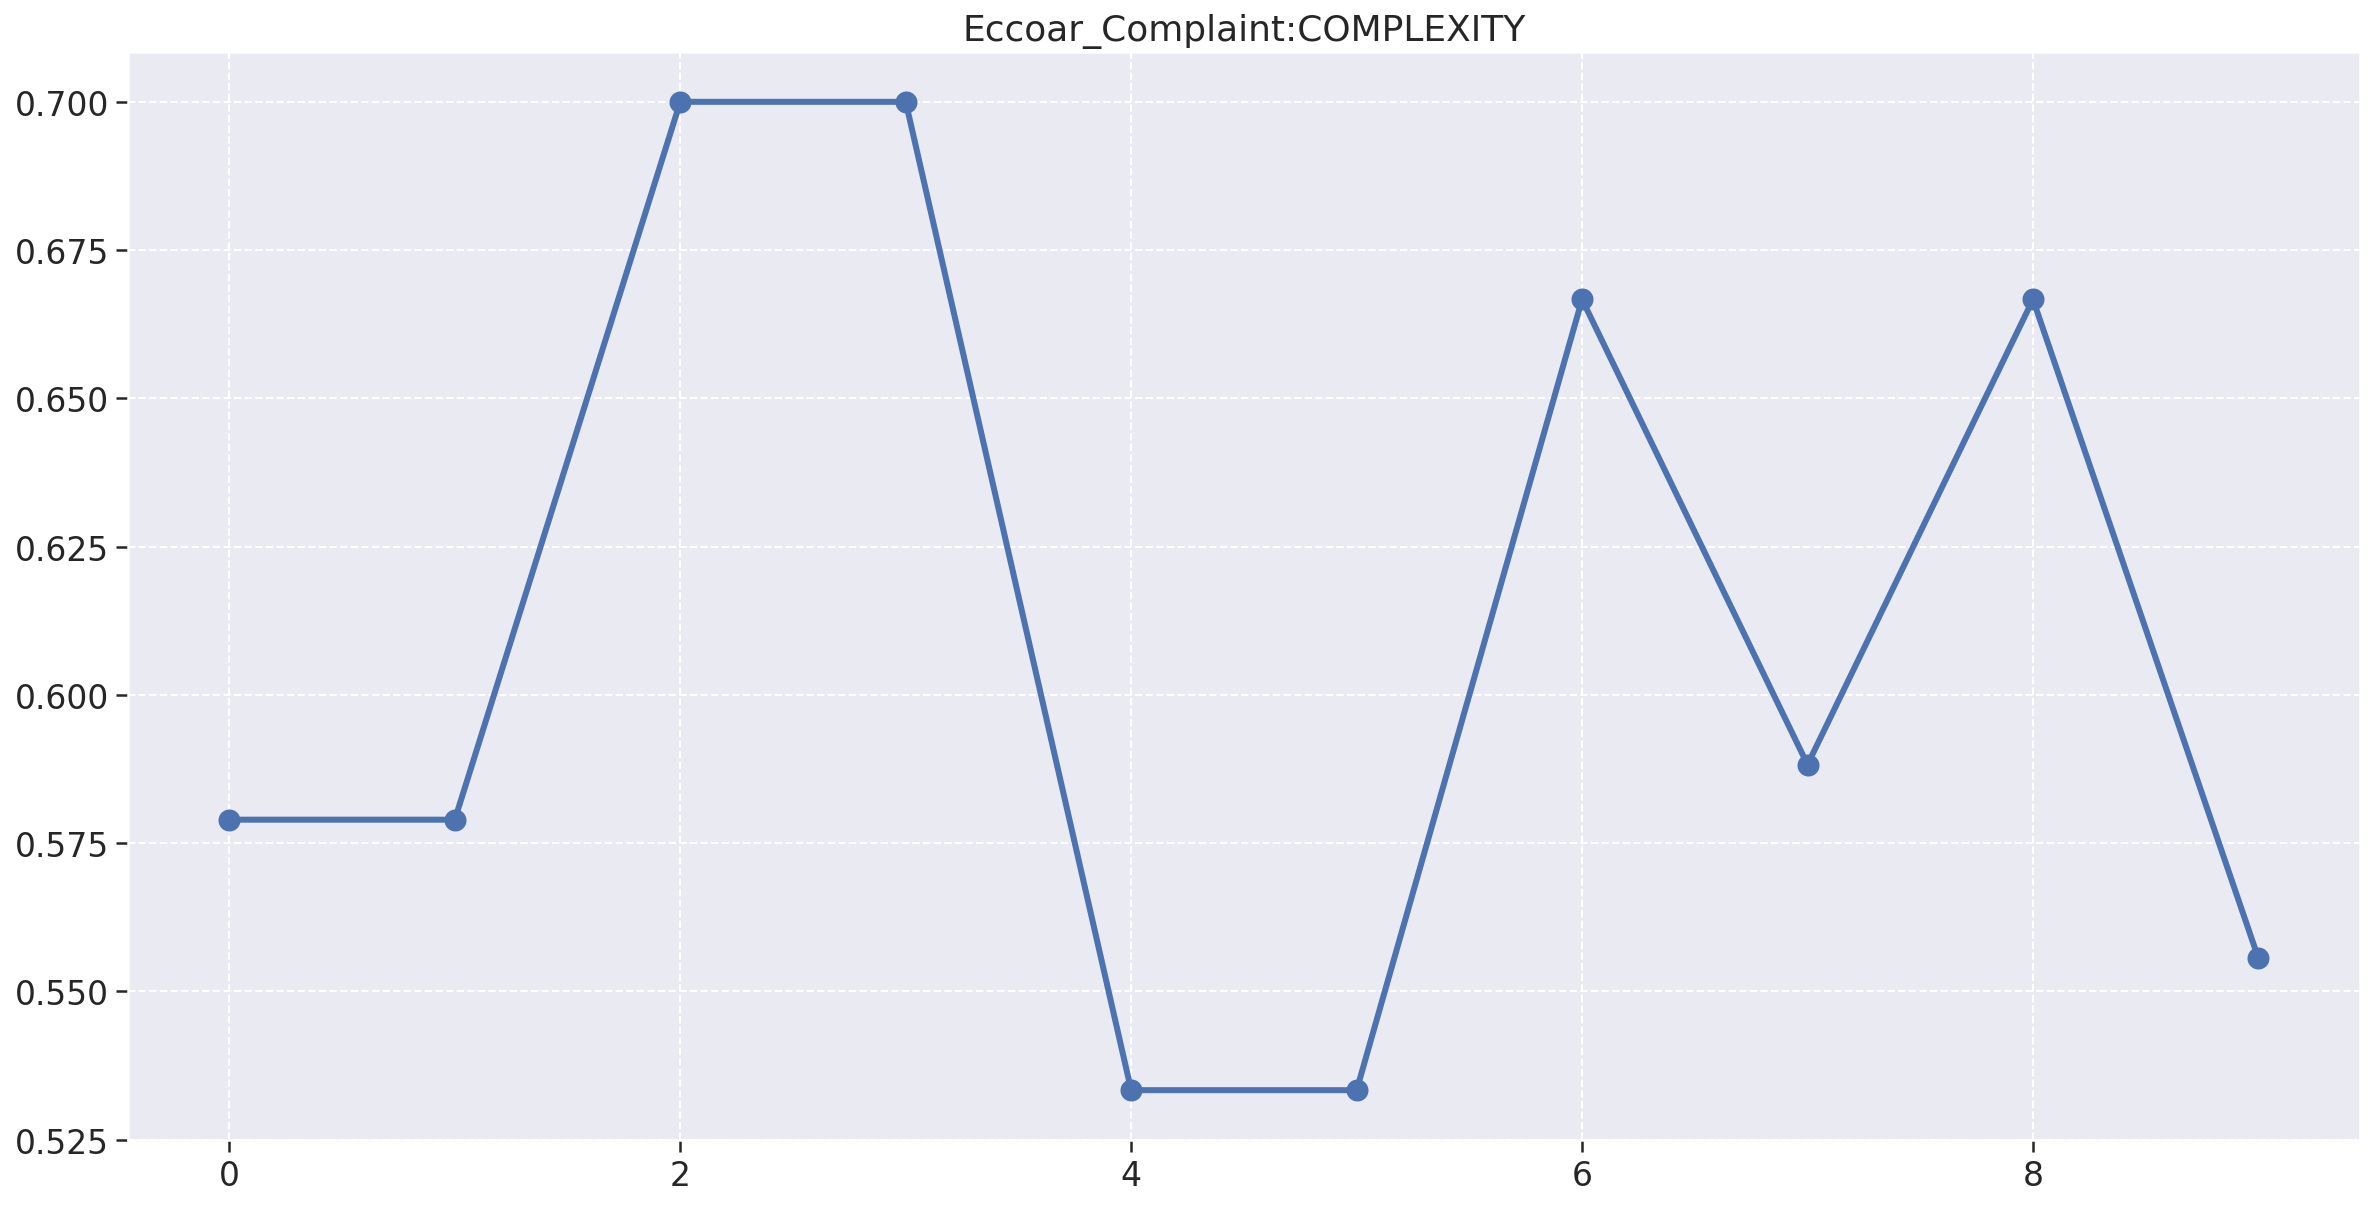

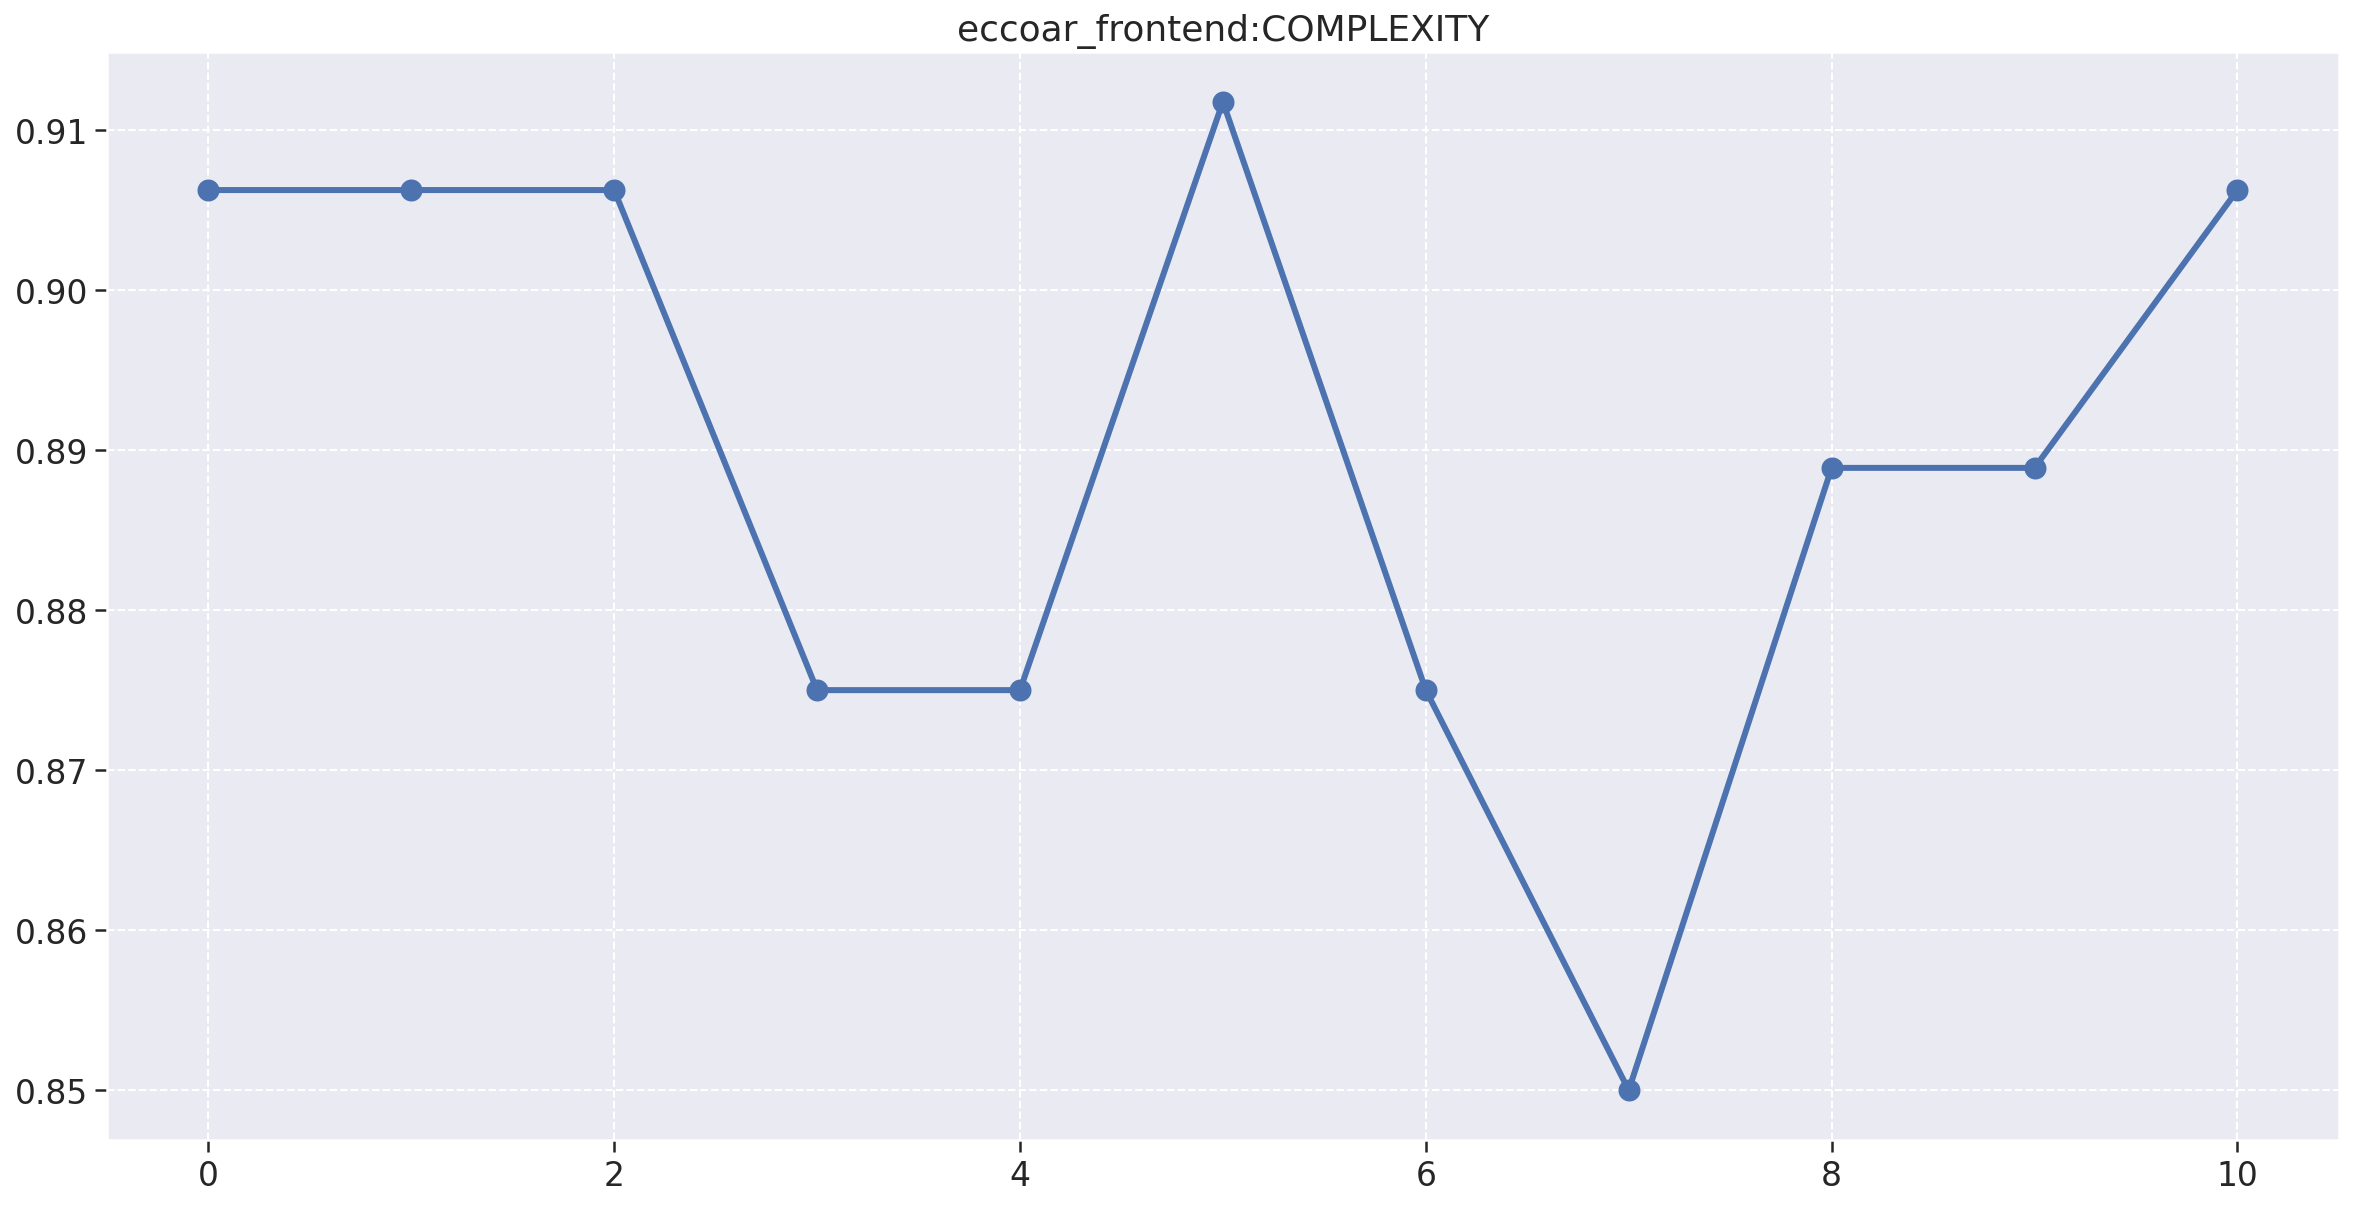

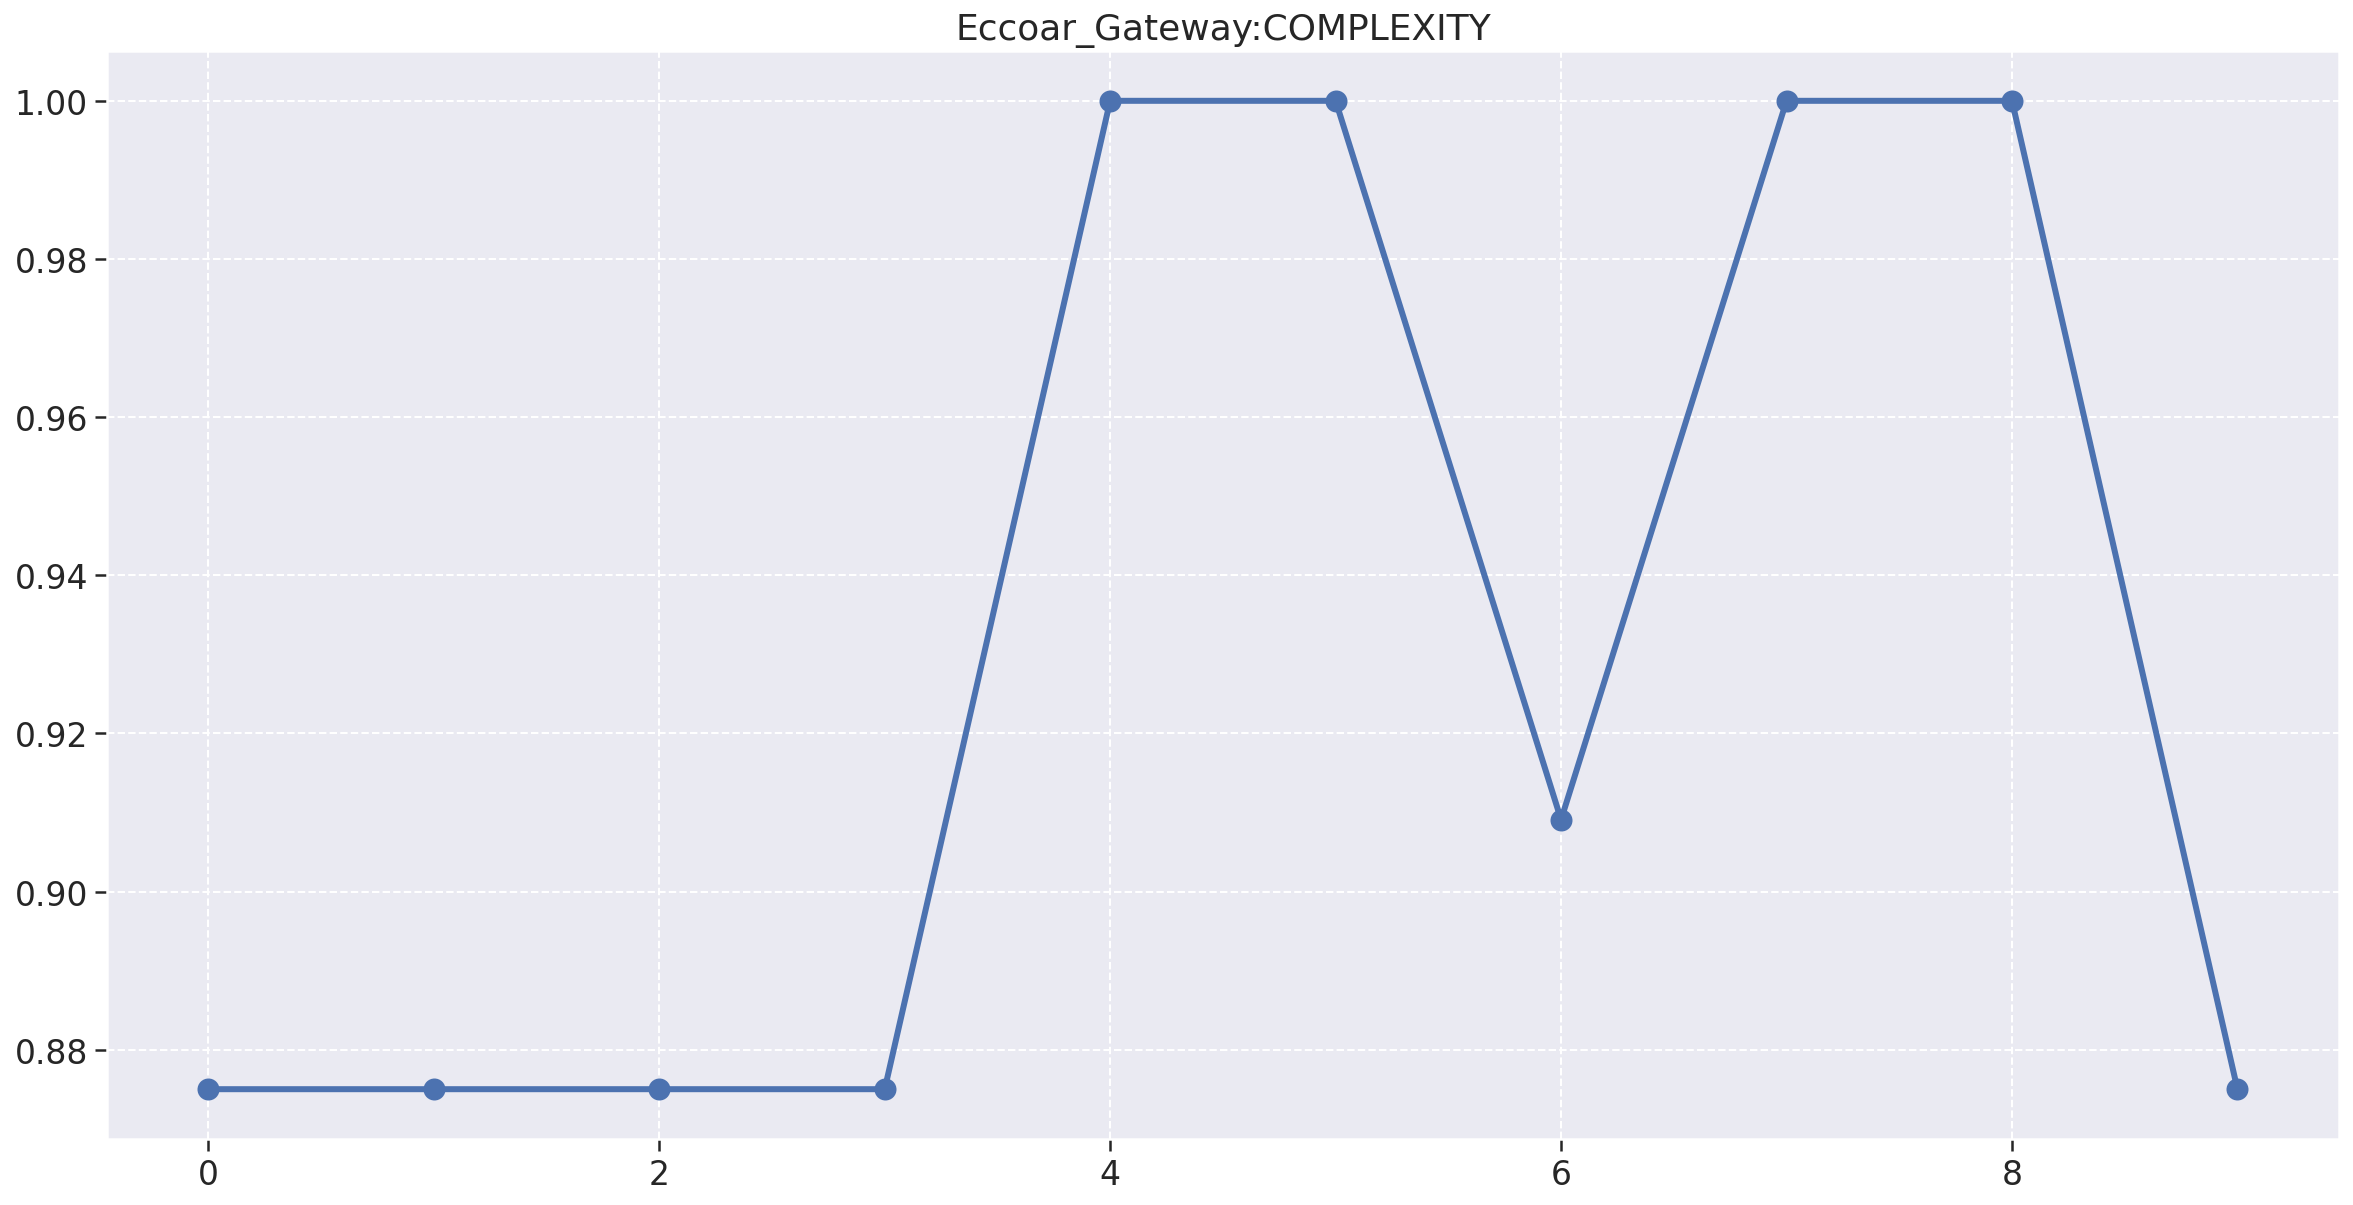

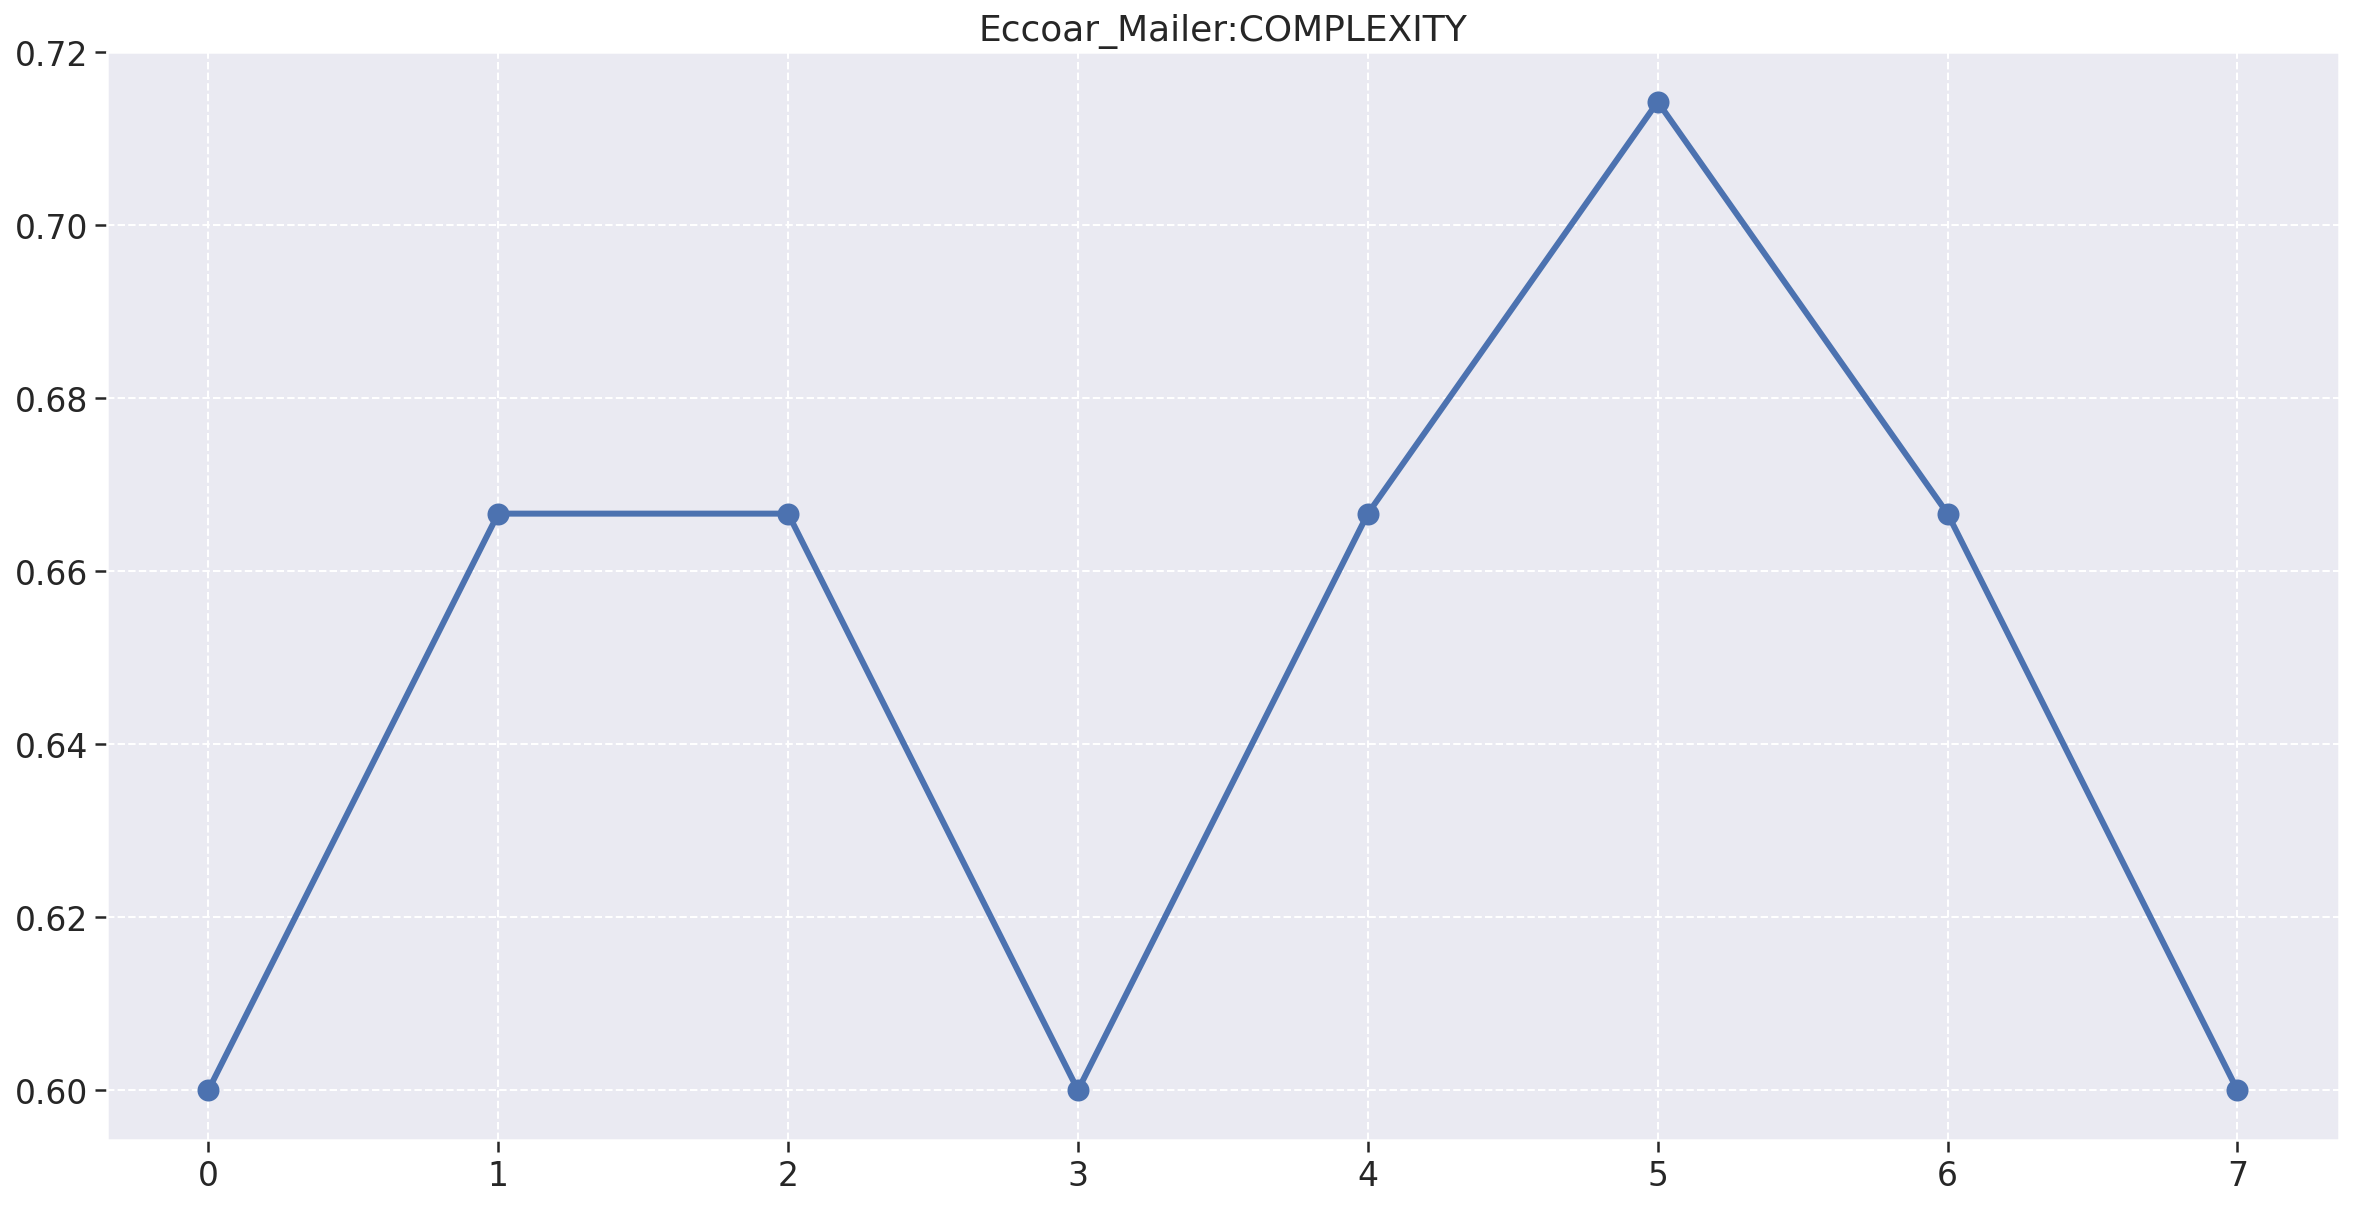

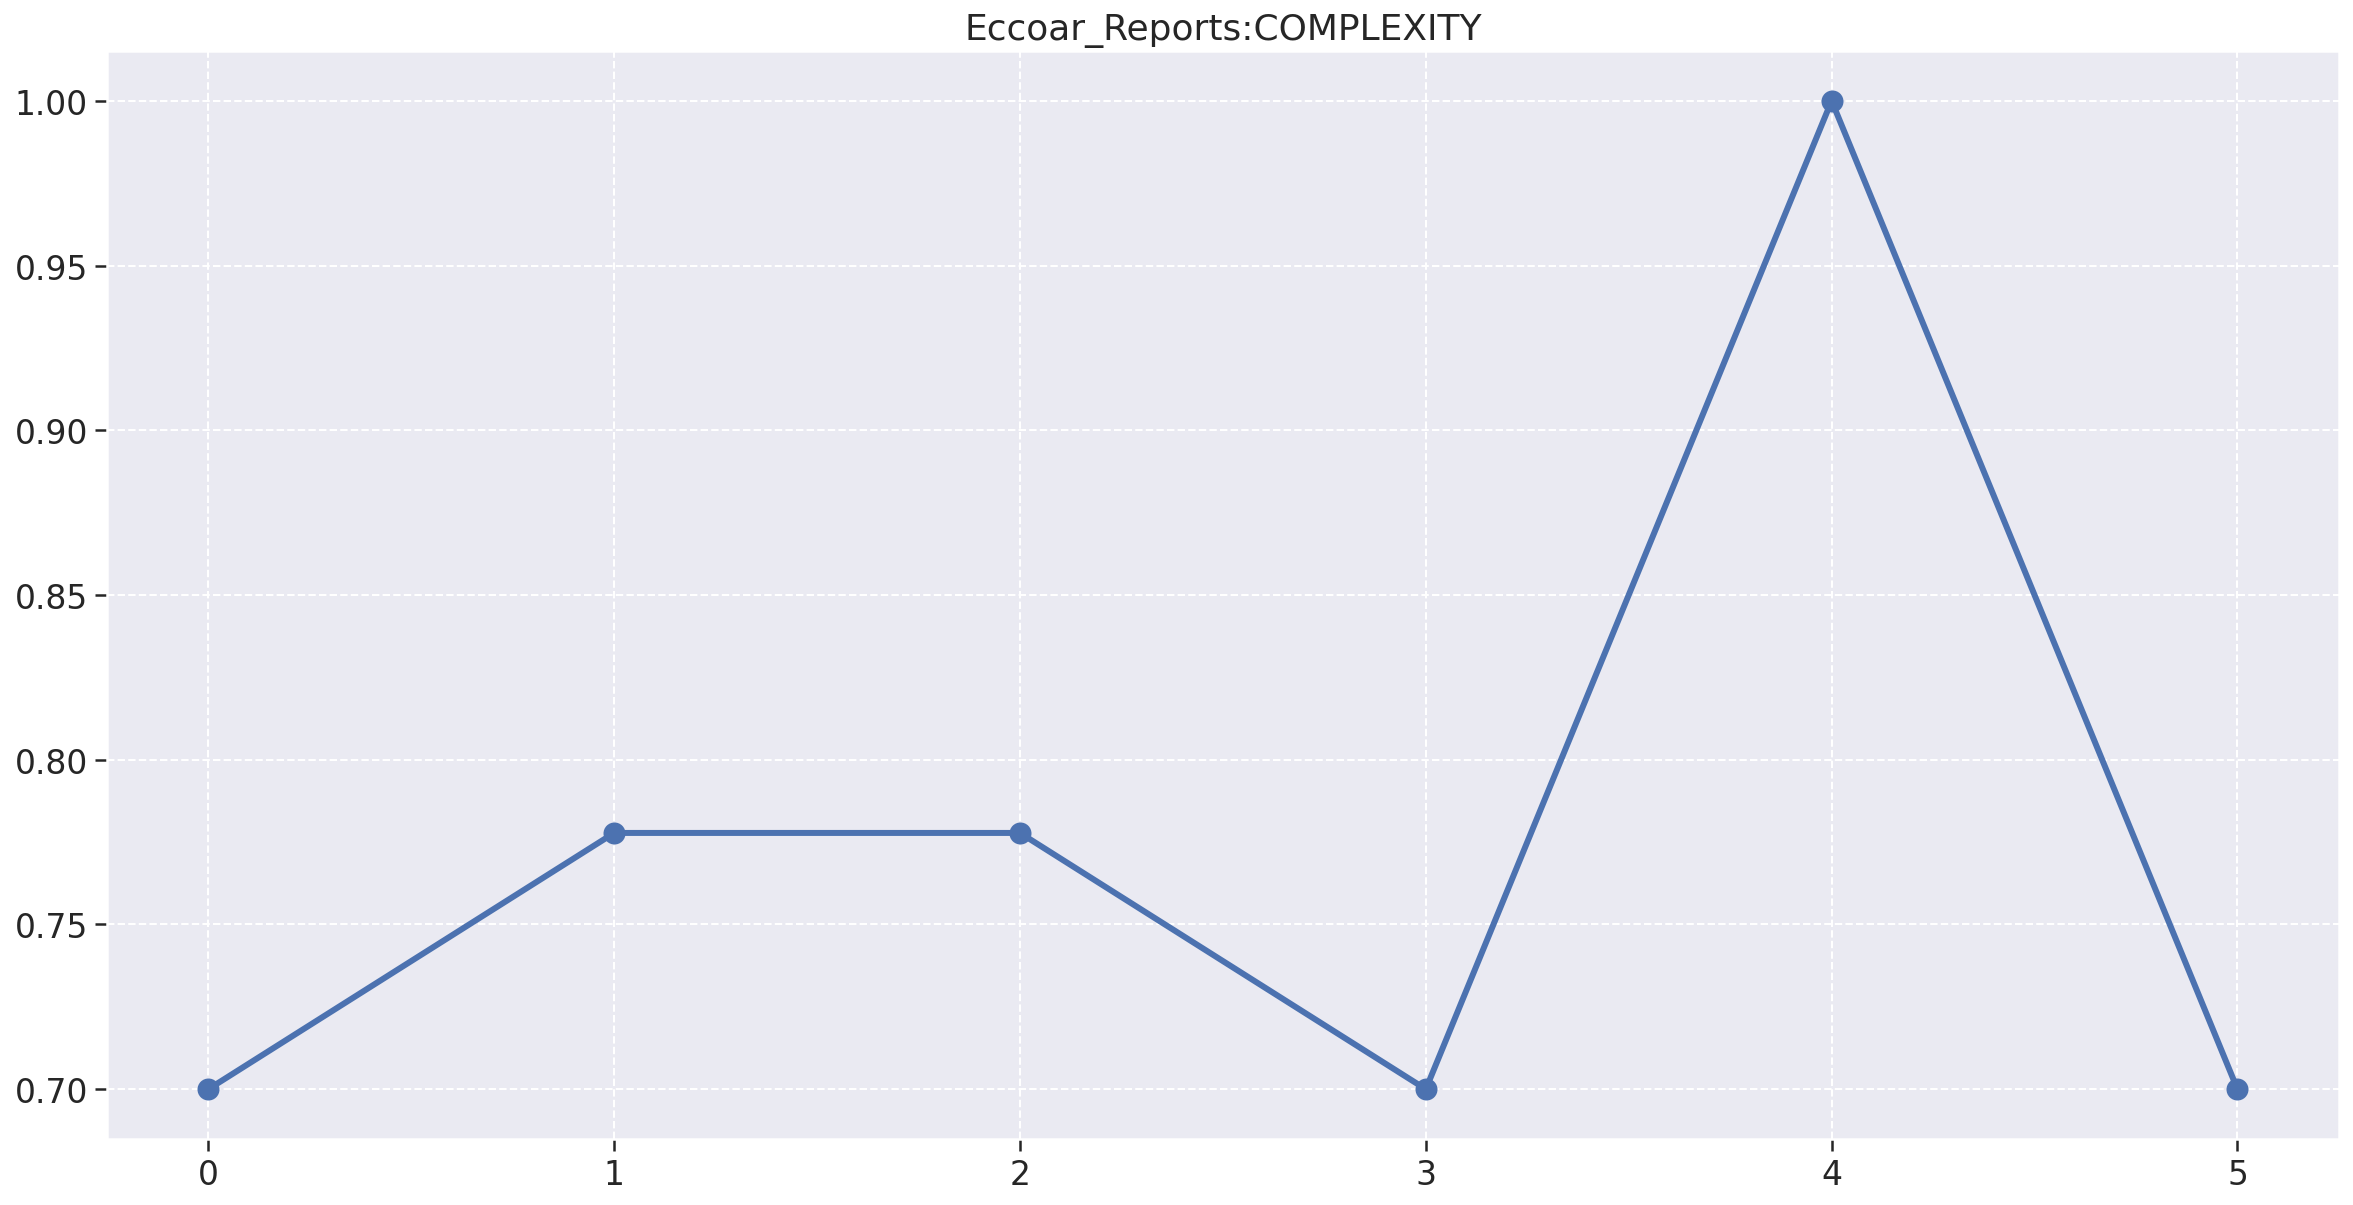

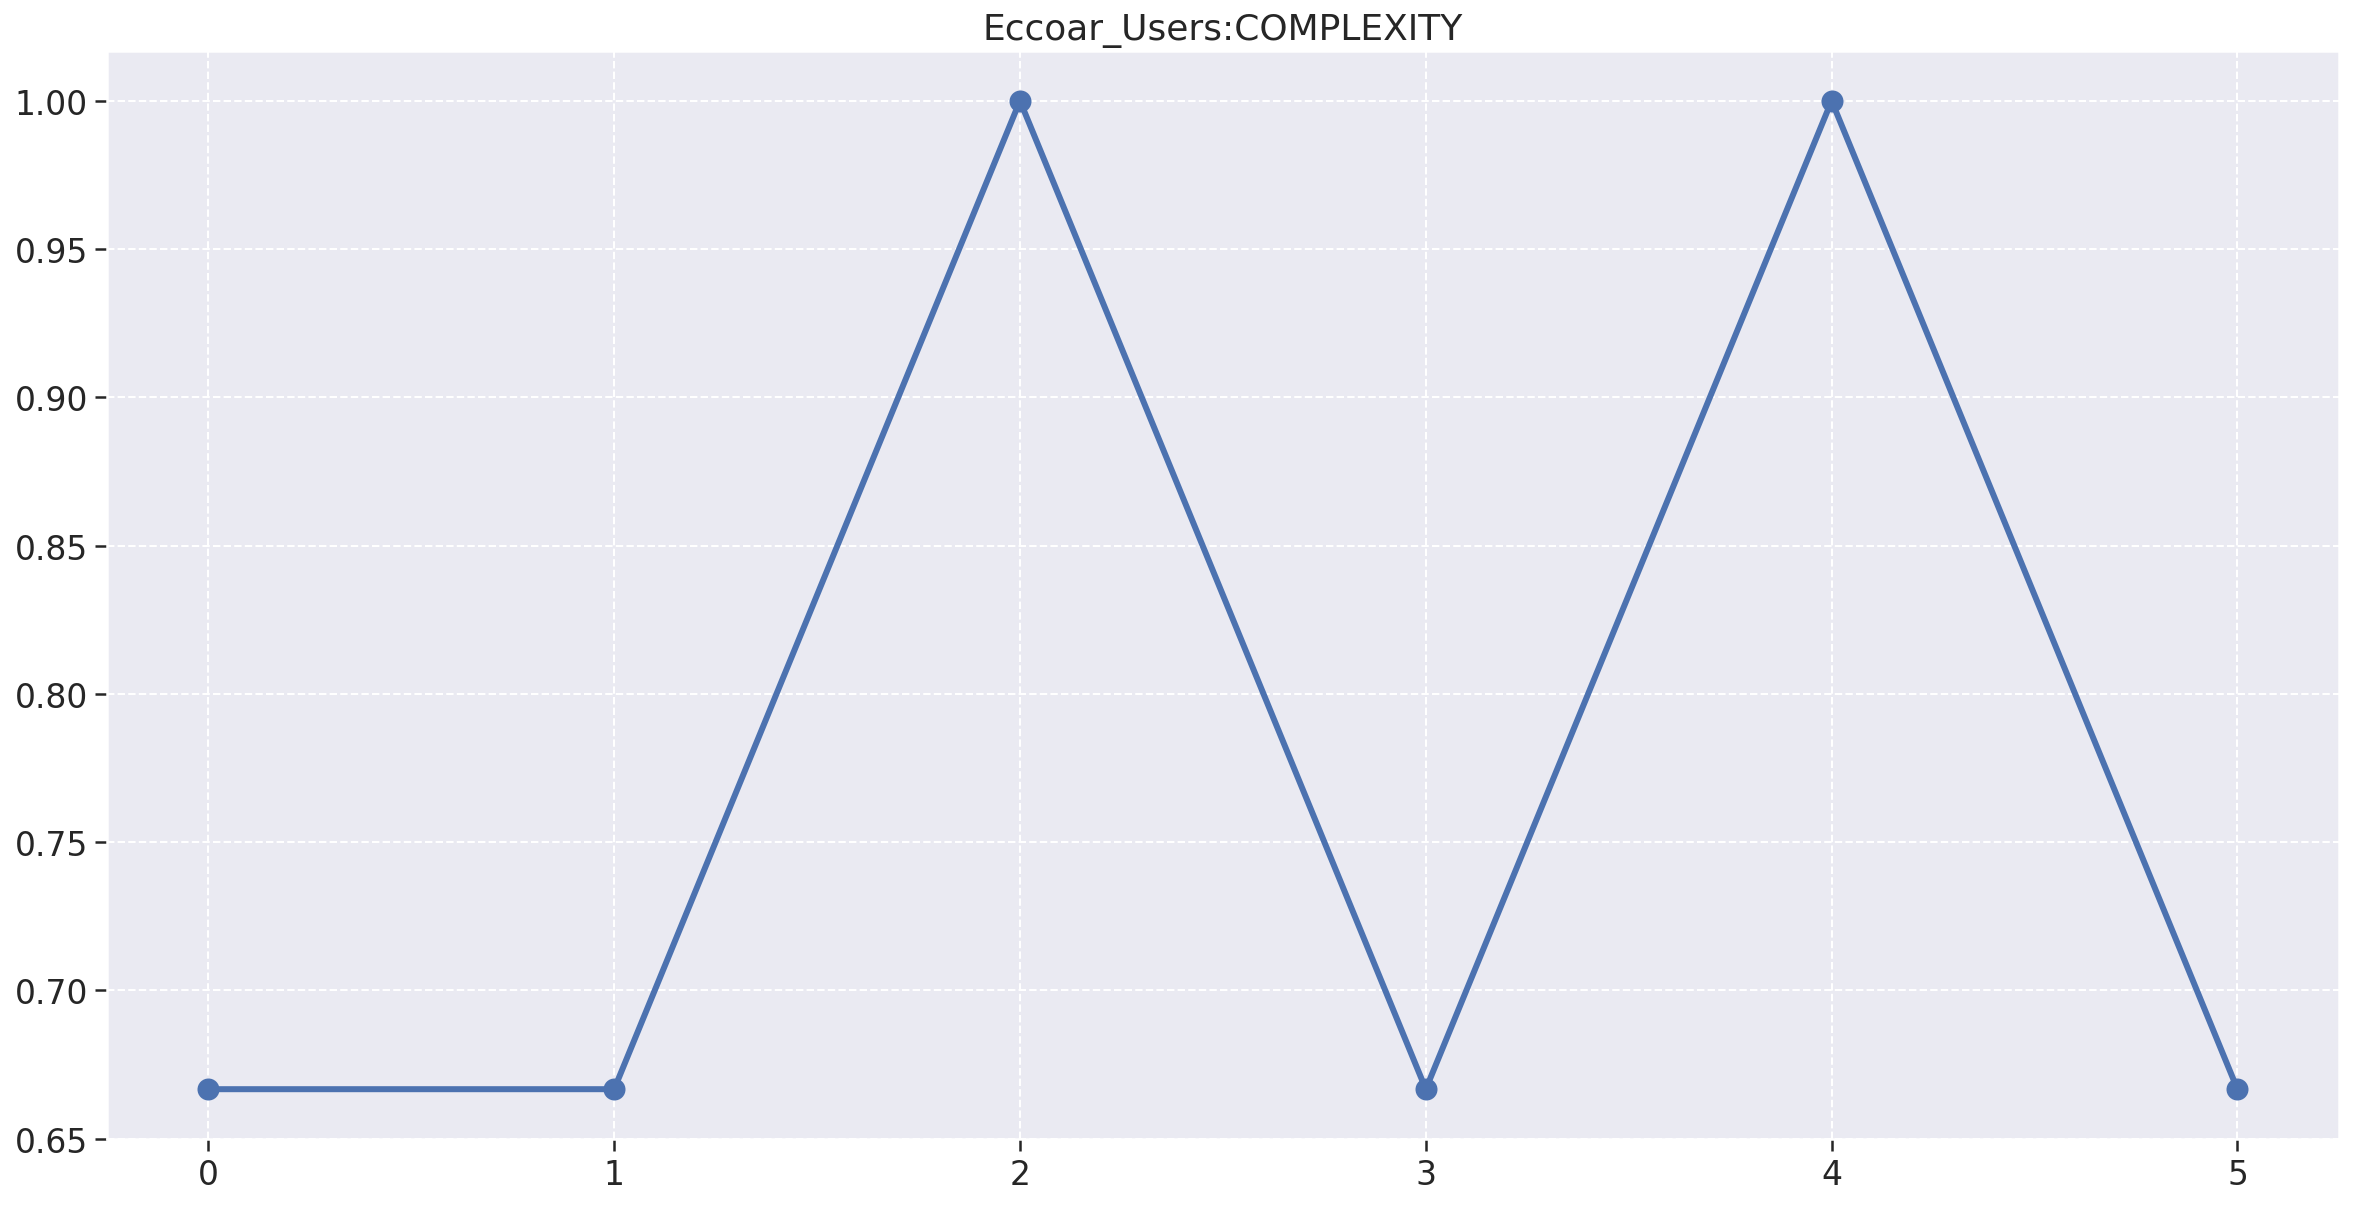

In [47]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.plot(metrics_df['m1'], linewidth=3, marker='o', markersize=10)

In [ ]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMMENTS")
    plt.plot(metrics_df['m2'], linewidth=3, marker='o', markersize=10)

In [ ]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:DUPLICATIONS")
    plt.plot(metrics_df['m3'], linewidth=3, marker='o', markersize=10)

### Sub characteristic aggregation

- You must do this for each of your repositories

In [ ]:
psc2 = 1
pm7 = 0.5
pm9 = 0.5

for repository, metrics_df in repository_metrics.items(): 
    metrics_df['asc2'] = ((metrics_df['m7']*pm7)+(metrics_df['m9']*pm9))*psc2

In [ ]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

for repository, metrics_df in repository_metrics.items(): 
    metrics_df['asc1'] = ((metrics_df['m1']*pm1)+(metrics_df['m2']*pm2)+(metrics_df['m3']*pm3))*psc1

In [ ]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:asc1")
    plt.plot(metrics_df['asc1'], linewidth=3, marker='o', markersize=10)

In [ ]:
#fig = plt.figure(figsize=(20, 10))

#plt.plot(repo2['asc1'], linewidth=3, marker='o', markersize=10)

In [ ]:
#fig = plt.figure(figsize=(20, 10))


#plt.plot(repo1['asc1'], linewidth=3, marker='o', markersize=5)
#plt.plot(repo2['asc1'], linewidth=3, marker='o', markersize=5)
...

In [ ]:
#metrics_df = pd.concat([repo1_metrics, repo2_metrics, ...], ignore_index=True)

#metrics_df['ac1'] = metrics_df['asc1'] * 1
#metrics_df['total'] = metrics_df['asc1'] * 1

# Histogram Repositories Analysis

In [ ]:
def generate_histogram(metric, metric_name, color):
    for repository, metrics_df in repository_metrics.items():
        fig = plt.figure(figsize=(30, 10))
        plt.title(f"{repository}:{metric_name}")
        plt.bar(metrics_df['version'], metrics_df[metric], color=color)
        plt.show()

In [ ]:
generate_histogram('m1', 'COMPLEXITY', 'g')

In [ ]:
generate_histogram('m2', 'COMMENTS', 'b')

In [ ]:
generate_histogram('m3', 'DUPLICATIONS', 'red')

In [ ]:
all_metrics_df = pd.DataFrame()

for repository, metrics_df in repository_metrics.items():
    all_metrics_df = pd.concat([all_metrics_df, metrics_df], ignore_index=True)

all_metrics_df['ac2'] = all_metrics_df['asc2'] * 1
all_metrics_df['totalAC2'] = all_metrics_df['asc2'] * 1

In [ ]:
corrMatrix = pd.DataFrame()
corrMatrix = all_metrics_df.corr()

In [ ]:
corrMatrix

# DataFrame M1, M2, M3


In [ ]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

for repository, metrics_df in repository_metrics.items(): 
    metrics_df['asc1'] = ((metrics_df['m1']*pm1)+(metrics_df['m2']*pm2)+(metrics_df['m3']*pm3))*psc1

In [ ]:
all_metrics_df = pd.DataFrame()

for repository, metrics_df in repository_metrics.items():
    all_metrics_df = pd.concat([all_metrics_df, metrics_df], ignore_index=True)

all_metrics_df['ac1'] = all_metrics_df['asc1'] * 1
all_metrics_df['totalAC1'] = all_metrics_df['asc1'] * 1

In [ ]:
all_metrics_df

In [ ]:
metrics_df.to_excel('data/metrics_df.xlsx', index = False)

# DataFrame M7, M9